Customer Service Requests Analysis

In [3]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style

In [4]:
data_311=pd.read_csv('311_Service_Requests_from_2010_to_Present.csv')

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (48,49) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
#View top 5 records
data_311.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


1. Understand the dataset:
1. 1 Identify the shape of the dataset

In [6]:
# check the shape of the dataset
data_311.shape

(300698, 53)

In [7]:
# view the columns
data_311.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

1. 2 Identify variables with null values

In [9]:
# check the null values in dataset
data_311.isnull().sum()

Unique Key                             0
Created Date                           0
Closed Date                         2164
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          5914
Location Type                        131
Incident Zip                        2615
Incident Address                   44410
Street Name                        44410
Cross Street 1                     49279
Cross Street 2                     49779
Intersection Street 1             256840
Intersection Street 2             257336
Address Type                        2815
City                                2614
Landmark                          300349
Facility Type                       2171
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2187
Community Board                        0
Borough         

2. Perform basic data exploratory analysis:
2. 1 Utilize missing value treatment
2. 2 Analyze the date column and remove the entries if it has an incorrect timeline
2. 3 Draw a frequency plot for city-wise complaints
2. 4 Draw scatter and hexbin plots for complaint concentration across Brooklyn

In [10]:
 #As we seen Closed Date is important column and have many missing values
data_311[data_311['Closed Date'].isnull()]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
416,32305700,12/31/2015 02:16:04 PM,NaN,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,NaN,5426-5526 90TH ST,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
611,32309308,12/31/2015 09:58:06 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,NaN,30 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1648,32303348,12/30/2015 05:13:42 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,NaN,21600-2169 91ST AVE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1816,32294519,12/29/2015 10:44:50 PM,NaN,NYPD,New York City Police Department,Derelict Vehicle,With License Plate,Street/Sidewalk,NaN,127 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1965,32296487,12/29/2015 07:09:13 PM,NaN,NYPD,New York City Police Department,Derelict Vehicle,With License Plate,Street/Sidewalk,NaN,5201-5299 68TH ST,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300273,30287350,03/29/2015 02:40:19 PM,NaN,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,NaN,3801-3999 23RD AVE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
300492,30284963,03/29/2015 08:50:15 AM,NaN,NYPD,New York City Police Department,Vending,Unlicensed,Street/Sidewalk,NaN,COOPER AVE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
300496,30285492,03/29/2015 08:44:13 AM,NaN,NYPD,New York City Police Department,Vending,Unlicensed,Street/Sidewalk,NaN,80 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
300620,30282717,03/29/2015 01:55:35 AM,NaN,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,NaN,CRESCENT AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
data_311[data_311['Unique Key']==32305700]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
416,32305700,12/31/2015 02:16:04 PM,NaN,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,NaN,5426-5526 90TH ST,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
data_311['Created Date'] = data_311['Created Date'].astype('datetime64[ns]')
data_311['Closed Date'] = data_311['Closed Date'].astype('datetime64[ns]')
data_311[['Created Date','Closed Date']]

,Created Date,Closed Date
0,2015-12-31 23:59:45,2016-01-01 00:55:00
1,2015-12-31 23:59:44,2016-01-01 01:26:00
2,2015-12-31 23:59:29,2016-01-01 04:51:00
3,2015-12-31 23:57:46,2016-01-01 07:43:00
4,2015-12-31 23:56:58,2016-01-01 03:24:00
...,...,...
300693,2015-03-29 00:33:41,NaT
300694,2015-03-29 00:33:28,2015-03-29 02:33:59
300695,2015-03-29 00:33:03,2015-03-29 03:40:20
300696,2015-03-29 00:33:02,2015-03-29 04:38:35


In [20]:
data_311['Request_Closing_Time']=data_311['Closed Date']-data_311['Created Date']
data_311['Request_Closing_Time']

0        0 days 00:55:15
1        0 days 01:26:16
2        0 days 04:51:31
3        0 days 07:45:14
4        0 days 03:27:02
               ...      
300693               NaT
300694   0 days 02:00:31
300695   0 days 03:07:17
300696   0 days 04:05:33
300697   0 days 04:08:49
Name: Request_Closing_Time, Length: 300698, dtype: timedelta64[ns]

In [24]:
#Num of Complaints closed after Due Date
data_311['Due Date'] = data_311['Due Date'].astype('datetime64[ns]')
over_time = data_311[data_311['Due Date']<data_311['Closed Date']]['Unique Key'].count()
less_time = data_311[data_311['Due Date']>data_311['Closed Date']]['Unique Key'].count()
same_time = data_311[data_311['Due Date']==data_311['Closed Date']]['Unique Key'].count()
not_closed = data_311['Closed Date'].isnull().sum()
times = np.array([over_time,less_time,same_time,not_closed])
names = np.array(['over_time','less_time','same_time','not_closed'])
times = pd.Series(times)
names = pd.Series(names)
dataframe = pd.DataFrame({'time_taken':names, 'time':times})
dataframe

,time_taken,time
0,over_time,38580
1,less_time,259892
2,same_time,61
3,not_closed,2164


<AxesSubplot:xlabel='time_taken'>

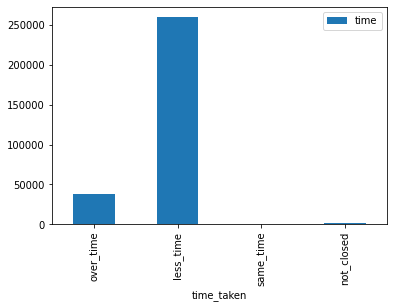

In [26]:
dataframe.plot(kind='bar',x='time_taken')

<AxesSubplot:xlabel='Complaint Type'>

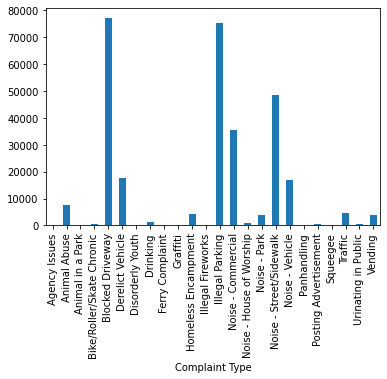

In [28]:
data_311.groupby('Complaint Type')['Unique Key'].count().plot(kind='bar')

<AxesSubplot:xlabel='Descriptor'>

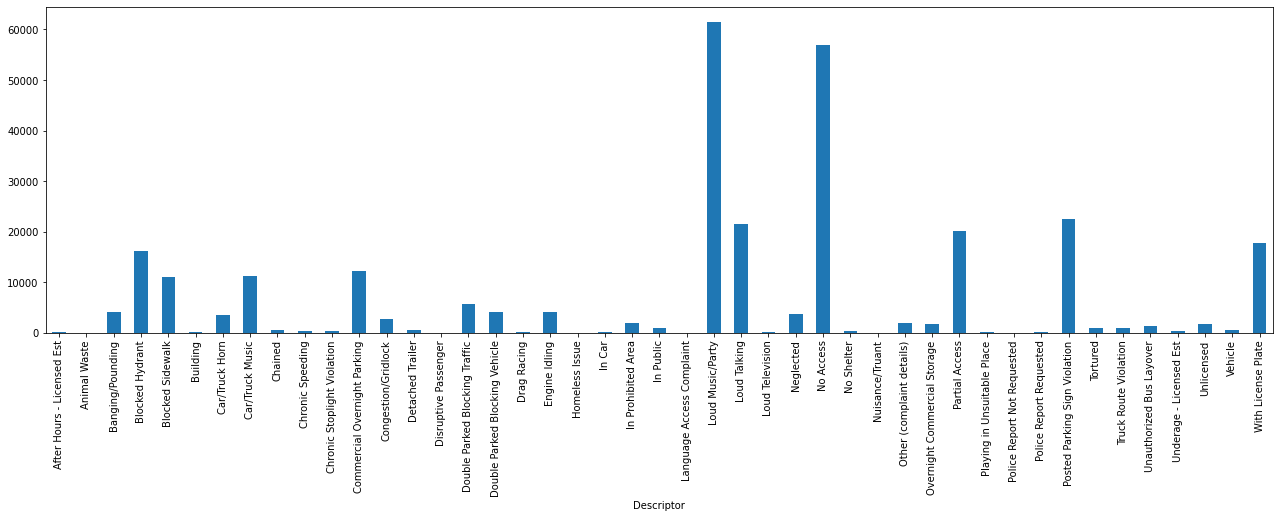

In [30]:
data_311.groupby('Descriptor')['Unique Key'].count().plot(kind='bar',figsize=[22,6])

In [31]:
data_311.groupby('Status')['Status'].agg('count')

Status
Assigned       786
Closed      298471
Draft            2
Open          1439
Name: Status, dtype: int64

<AxesSubplot:xlabel='Status'>

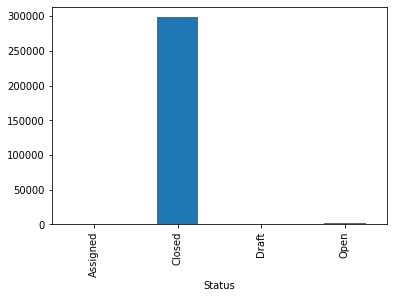

In [32]:
data_311.groupby('Status')['Status'].agg('count').plot(kind='bar')

In [33]:
data_311.groupby('Location Type')['Unique Key'].count()

Location Type
Bridge                             2
Club/Bar/Restaurant            17360
Commercial                        62
Ferry                              1
Highway                          215
House and Store                   93
House of Worship                 929
Park                               1
Park/Playground                 4773
Parking Lot                      117
Residential Building             227
Residential Building/House      6960
Roadway Tunnel                    35
Store/Commercial               20381
Street/Sidewalk               249299
Subway Station                    34
Terminal                           1
Vacant Lot                        77
Name: Unique Key, dtype: int64

<AxesSubplot:xlabel='Location Type'>

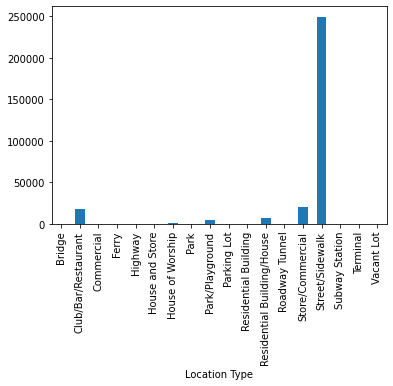

In [34]:
data_311.groupby('Location Type')['Unique Key'].count().plot(kind='bar')

In [40]:
#convert Request_Closing_Time to mins
data_311['Request_Closing_Time'] = data_311['Request_Closing_Time'].astype('timedelta64[m]')

In [41]:
data_311['Request_Closing_Time']

0          55.0
1          86.0
2         291.0
3         465.0
4         207.0
          ...  
300693      NaN
300694    120.0
300695    187.0
300696    245.0
300697    248.0
Name: Request_Closing_Time, Length: 300698, dtype: float64

In [42]:
data_311.groupby('Location Type')['Request_Closing_Time'].agg('mean').sort_values()

Location Type
Subway Station                  141.970588
Club/Bar/Restaurant             185.769954
House of Worship                191.523193
Store/Commercial                197.783035
Park/Playground                 206.836876
Highway                         223.074766
Bridge                          229.000000
Roadway Tunnel                  266.085714
Street/Sidewalk                 268.211355
Residential Building            288.775330
House and Store                 300.462366
Residential Building/House      309.203222
Parking Lot                     319.863248
Commercial                      320.193548
Vacant Lot                      448.103896
Park                          20210.000000
Ferry                                  NaN
Terminal                               NaN
Name: Request_Closing_Time, dtype: float64

<AxesSubplot:xlabel='Location Type'>

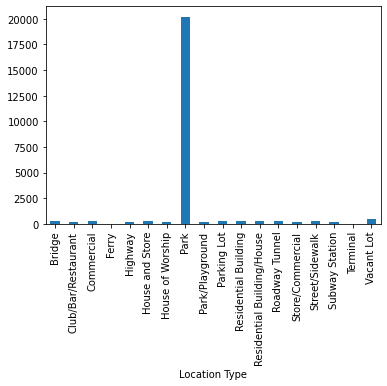

In [43]:
data_311.groupby('Location Type')['Request_Closing_Time'].agg('mean').plot(kind='bar')

<AxesSubplot:xlabel='Location Type'>

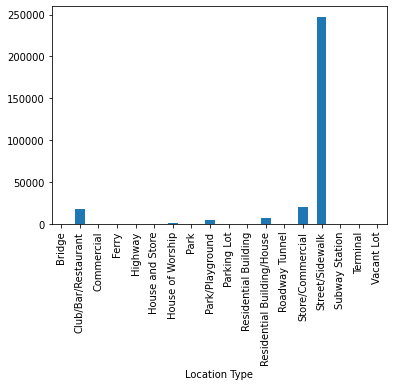

In [45]:

data_311.groupby('Location Type')['Request_Closing_Time'].agg('count').plot(kind='bar')

Complaint Type and Request_Closing_Time are related

In [46]:
data_311.groupby('Complaint Type')['Request_Closing_Time'].agg('mean')

Complaint Type
Agency Issues                  315.333333
Animal Abuse                   312.489830
Animal in a Park             20210.000000
Bike/Roller/Skate Chronic      225.693396
Blocked Driveway               284.148041
Derelict Vehicle               441.542756
Disorderly Youth               213.167832
Drinking                       231.391373
Ferry Complaint                       NaN
Graffiti                       428.752212
Homeless Encampment            261.637908
Illegal Fireworks              165.470238
Illegal Parking                269.762894
Noise - Commercial             188.524272
Noise - House of Worship       191.287406
Noise - Park                   204.343859
Noise - Street/Sidewalk        206.415509
Noise - Vehicle                215.038220
Panhandling                    262.072131
Posting Advertisement          118.251543
Squeegee                       242.500000
Traffic                        206.614991
Urinating in Public            217.302365
Vending            

In [47]:
df = data_311[['Complaint Type', 'Request_Closing_Time']].sort_values(by='Complaint Type').reset_index().drop('index',axis=1)
df.columns = ['Complaint_Type','Request_Closing_Time']
df

,Complaint_Type,Request_Closing_Time
0,Agency Issues,67.0
1,Agency Issues,623.0
2,Agency Issues,162.0
3,Agency Issues,452.0
4,Agency Issues,177.0
...,...,...
300693,Vending,17.0
300694,Vending,19.0
300695,Vending,137.0
300696,Vending,68.0


In [48]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

lm = ols('Request_Closing_Time ~ Complaint_Type',data=df).fit()
table = sm.stats.anova_lm(lm)
print(table)

                      df        sum_sq       mean_sq           F  PR(>F)
Complaint_Type      23.0  1.455041e+09  6.326263e+07  491.829393     0.0
Residual        298511.0  3.839663e+10  1.286272e+05         NaN     NaN


Ho = Complaint Type and Location Type are not related.

H1 = Complaint Type and Location Type are related

In [50]:
df1 = data_311[pd.notnull(data_311['Location Type'])]
df2 = df1[['Complaint Type', 'Location Type']].sort_values(by='Complaint Type').reset_index().drop('index',axis=1)
df2

,Complaint Type,Location Type
0,Animal Abuse,Residential Building/House
1,Animal Abuse,Residential Building/House
2,Animal Abuse,Residential Building/House
3,Animal Abuse,Residential Building/House
4,Animal Abuse,Residential Building/House
...,...,...
300562,Vending,Street/Sidewalk
300563,Vending,Store/Commercial
300564,Vending,Street/Sidewalk
300565,Vending,Residential Building/House


In [51]:
data_crosstab = pd.crosstab(df2['Complaint Type'], df2['Location Type'], margins = False)
from scipy.stats import chi2_contingency
g,p,dof,expctd = chi2_contingency(data_crosstab)
g,p

(1638407.580569627, 0.0)